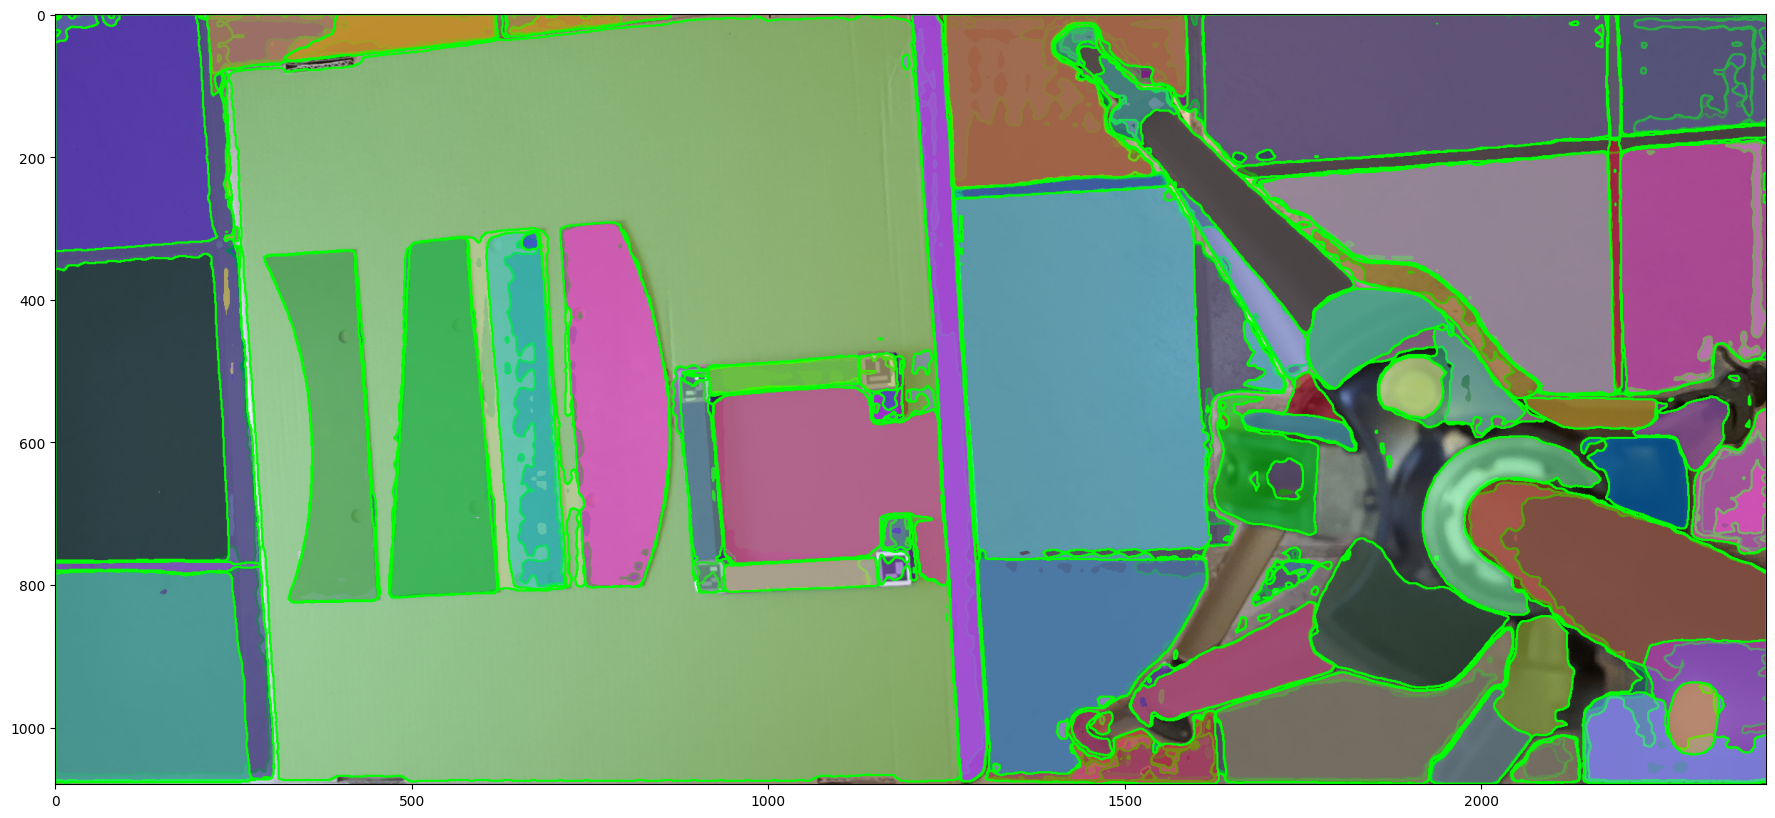

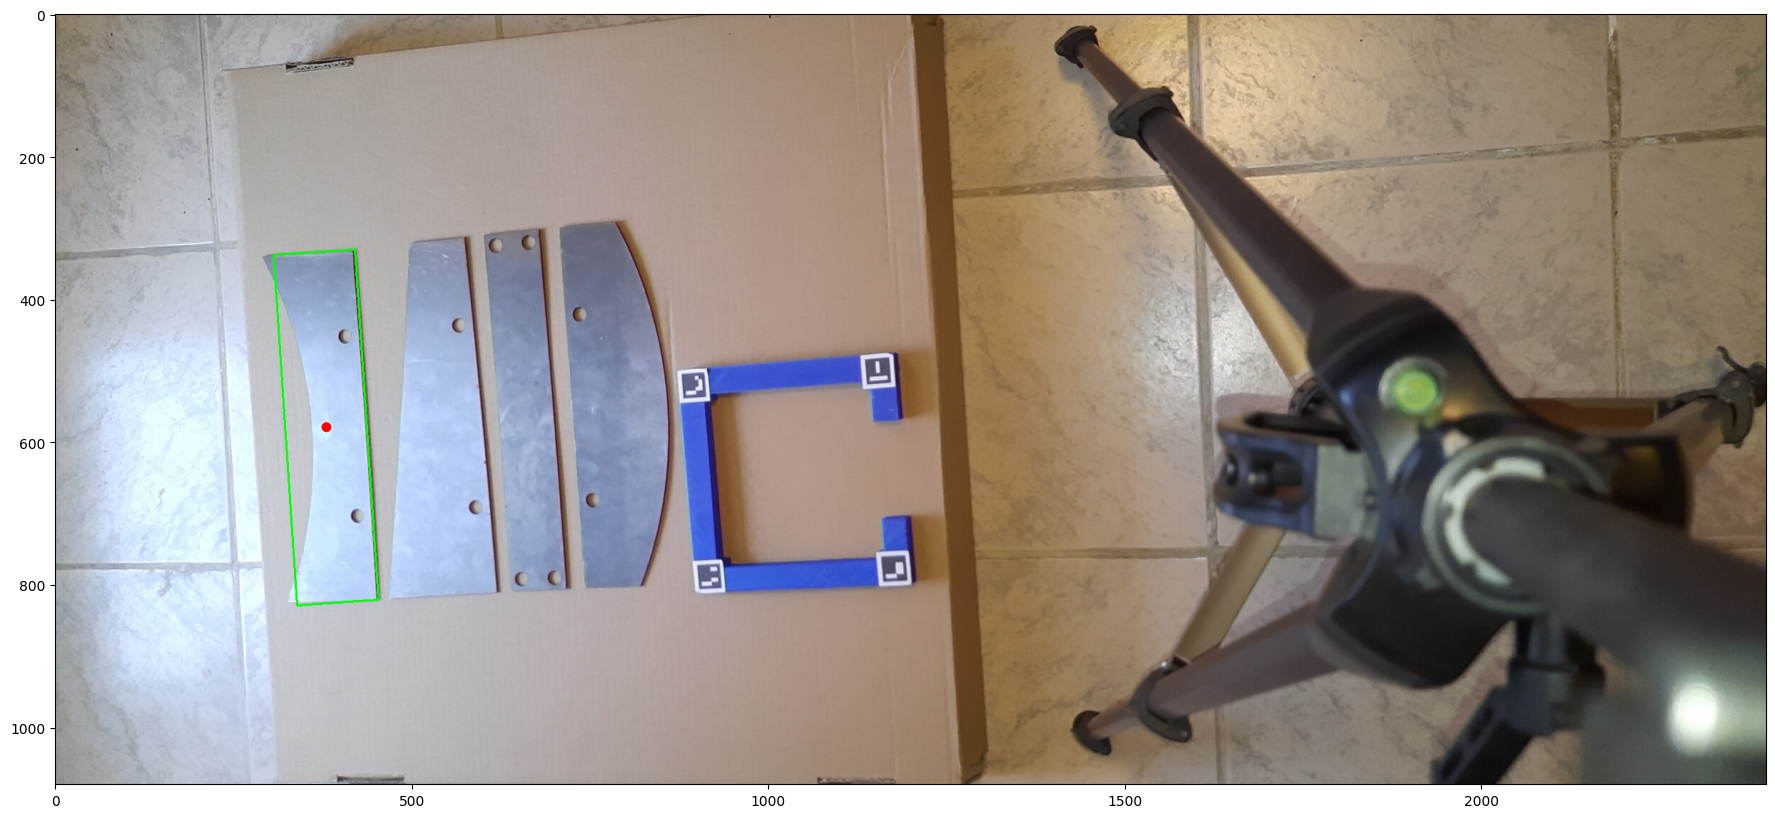

In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import sys, os

sys.path.append(os.path.abspath(".."))

from segmentation.segment import SegmentWithSAM
from segmentation.detect import ObjectDetector

object_params = {'area': 44732, 'area_ratio': 0.8, 'ratio': 4.2, 'tolerance': 15, 'area_tolerance': 15}


segment = SegmentWithSAM("../sam_vit_b_01ec64.pth")
detect = ObjectDetector()

IMAGE_PATH = "../images/f093cf83020341ceaa75a9fe698b2ff3.jpg"

for image_path in sorted(glob.glob(IMAGE_PATH)):
    image = cv2.imread(image_path)
    masks = segment.get_masks(image)
    annotated = segment.plot_masks(image, masks)

    plt.figure(figsize=(40,10))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.show()
        
    result, _ = detect.detect_object(image, masks, object_params)

    plt.figure(figsize=(40,10))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.show()